In [1]:
%load_ext autoreload
%autoreload 2

In [8]:

from transphorm.model_components.data_objects import SyntheticFPDataModule
from torch.utils.data import DataLoader, TensorDataset
import torch 
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import matplotlib.pyplot as plt

In [110]:
def create_pulse_arrays():
    n = np.zeros(1000)
    k = np.zeros(1000)

    # Choose a random number of indices to set to 1 in n
    n_indices = np.random.choice(1000, size=np.random.randint(1, 10), replace=False)
    n[n_indices] = 1

    # Choose a random number of indices to set to 1 in k
    k_indices = np.random.choice(1000, size=np.random.randint(1, 10), replace=False)
    k[k_indices] = 1 
    return n,k
def create_pulse_dip_array(n, k, decay_order=.9, duration=25):
    output = np.zeros(1000)  # initialize output array with zeros
    for i in range(1000):
        if n[i] == 1:
            for j in range(max(0, i), min(1000, i+duration+1)):
                output[j] = np.exp(-((j - i) / duration) **decay_order)  # pulse with polynomial decay
        elif k[i] == 1:
            for j in range(max(0, i), min(1000, i+duration+1)):
                output[j] = -np.exp(-((j - i) / duration) ** decay_order)  # dip with polynomial decay
    return output



def create_signal_recording():
    n,k = create_pulse_arrays()
    s = create_pulse_dip_array(n,k)
    r = np.vstack([s,n,k])
    return r
# def create_dataset(num_samples):
r = create_signal_recording()

def create_dataset(num_samples):
    return np.array([create_signal_recording() for _ in range(num_samples)])

d = create_dataset(10)



(10, 3, 1000)

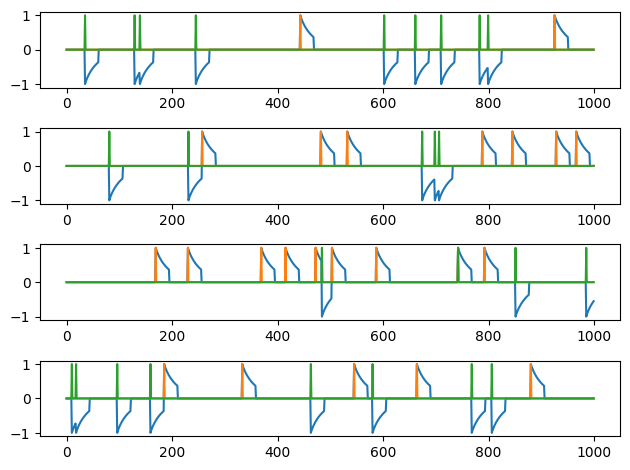

In [121]:
fig, ax = plt.subplots(nrows = 4)

for i in range(0,4):
    ax[i].plot(d[i][0])
    ax[i].plot(d[i][1])
    ax[i].plot(d[i][2])
plt.tight_layout()